In [18]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

# Collecting and merging databases

In [19]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [20]:
BAC = web.DataReader('BAC','yahoo',start,end)
C = web.DataReader('C','yahoo',start,end)
GS = web.DataReader('GS','yahoo',start,end)
JPM = web.DataReader('JPM','yahoo',start,end)
MS = web.DataReader('MS','yahoo',start,end)
WFC = web.DataReader('WFC','yahoo',start,end)

In [21]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [22]:
bank_stocks = pd.concat(objs=[BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.364250   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.009903   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.052433   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.002815   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.024078   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.224964  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.249123  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.345772  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.382030  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.756580  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.104458  
2006-01-04  31.530001  10870000.0  19.871269  
2006-01-05  31.495001  10158000.0  19.849213  
2006-01-06  31.680000   8403800.0  19.965807  
2006-01-09  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [24]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364250  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052433  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002815  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024078  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249123  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345772  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382030  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756580  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104458  
2006-01-04   31.799999  31.530001  10870000.0  19.871269  
2006-01-05   31.500000  31.495001  10158000.0  19.849213  
2006-01-06   31.580000  31.680000   8403800.0  19.965807  
2006-01-09   31.674999  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

# Exploring Data

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [26]:
returns = pd.DataFrame()

In [27]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


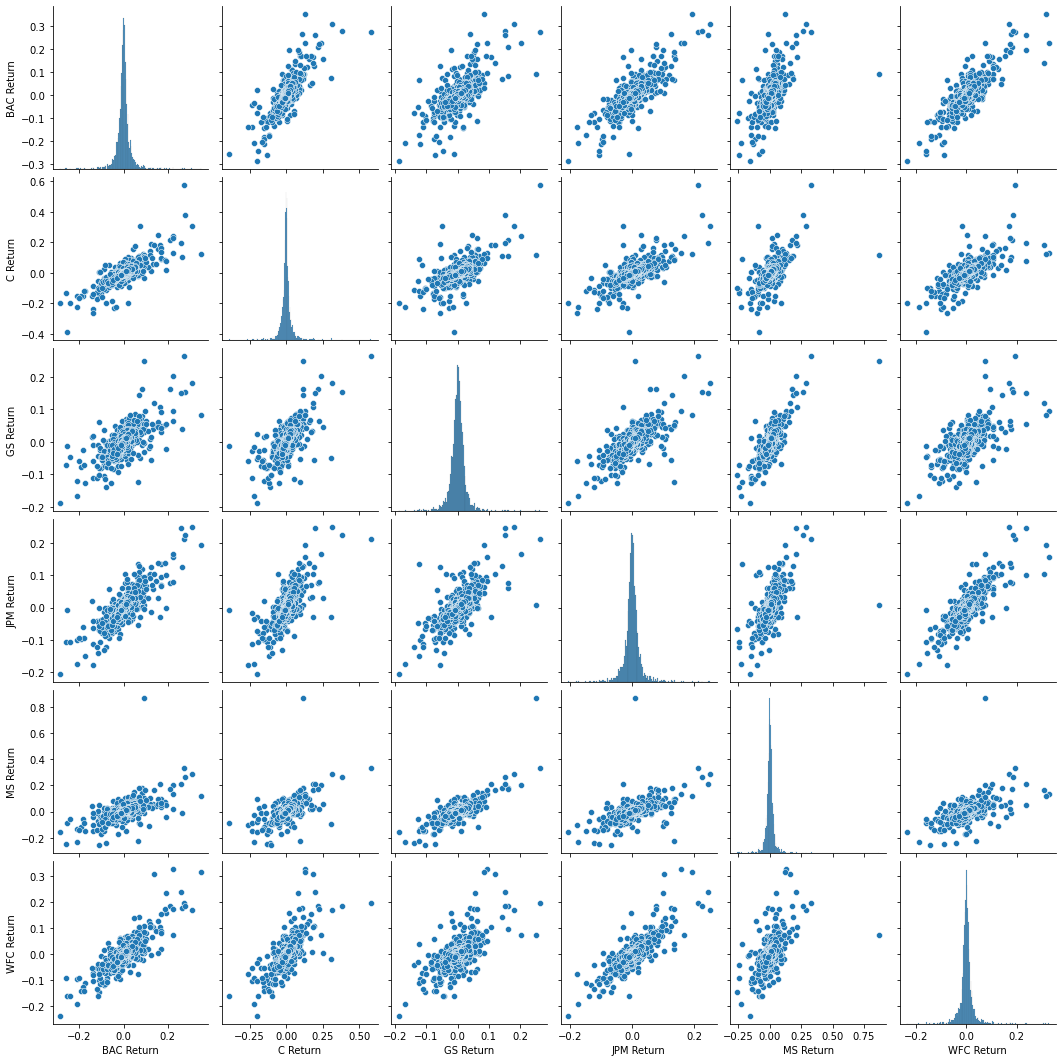

In [28]:
sns.pairplot(returns[1:])

In [29]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [30]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [31]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [32]:
returns.loc['2015'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

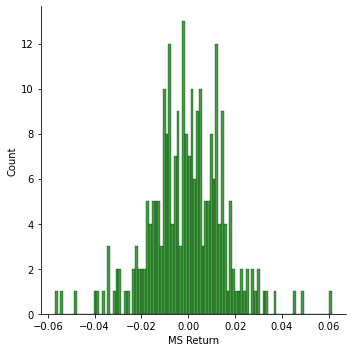

In [33]:
sns.displot(data=returns,x=returns.loc['2015-01-01':'2016-01-01']['MS Return'],bins=100,color='green')

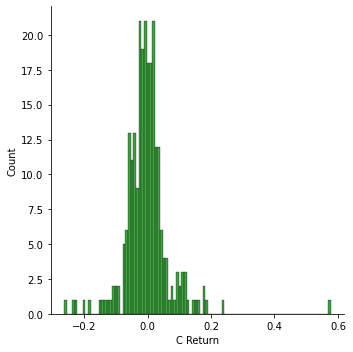

In [35]:
sns.displot(returns.loc['2008-01-01':'2009-01-01']['C Return'],bins=100,color='green')

# Visualizations of Data

In [36]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Date'>

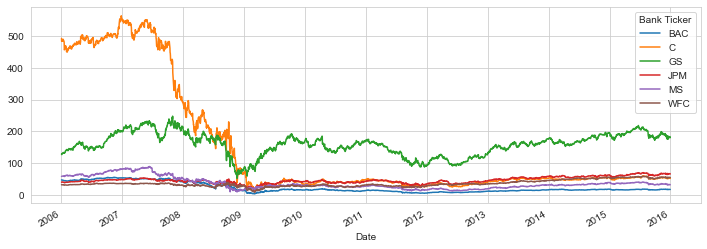

In [37]:
#This is a visualization of the share prices of all of the companies from 2006 to 2016
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

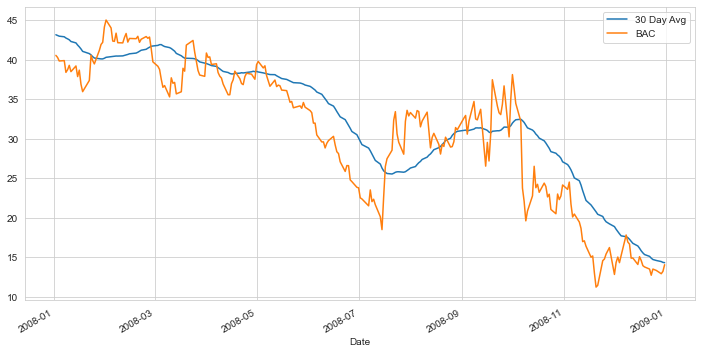

In [38]:
#This is visualization of Bank of America's share price and the 30 day average of the share price
BAC['30 Day Avg'] = BAC['Close'].rolling(window=30).mean()
plt.figure(figsize=(12,6))

BAC['30 Day Avg'].loc['2008-01-02':'2009-01-01'].plot()
BAC['Close'].loc['2008-01-02':'2009-01-01'].plot(label='BAC')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

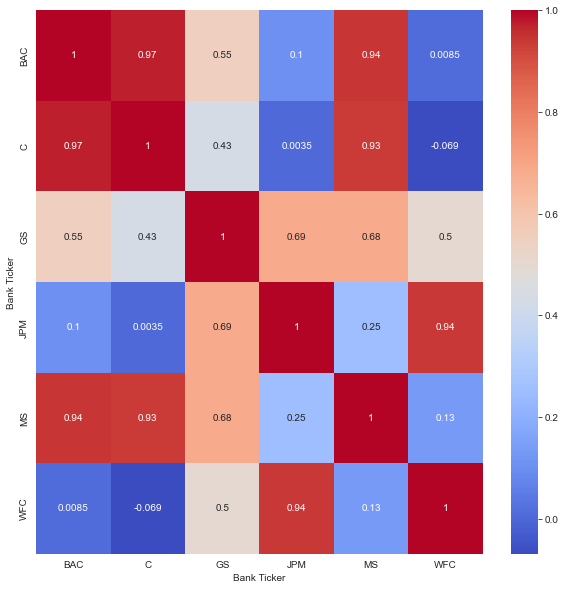

In [39]:
#This chart shows the correlation of the stock prices between companies
plt.figure(figsize=(10,10))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

# Tecnhical Analysis Charts

In [40]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle') 
#Candle plot

In [41]:
MS['Close'].loc['2015-01-02':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55]) 
#Simple moving averages plot

In [42]:
BAC['Close'].loc['2015-01-02':'2016-01-01'].ta_plot(study='boll')
#Bollinger band plot